### **Carolina Garma Escoffié**
Evaluation 3 - Classification Models

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
# Check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

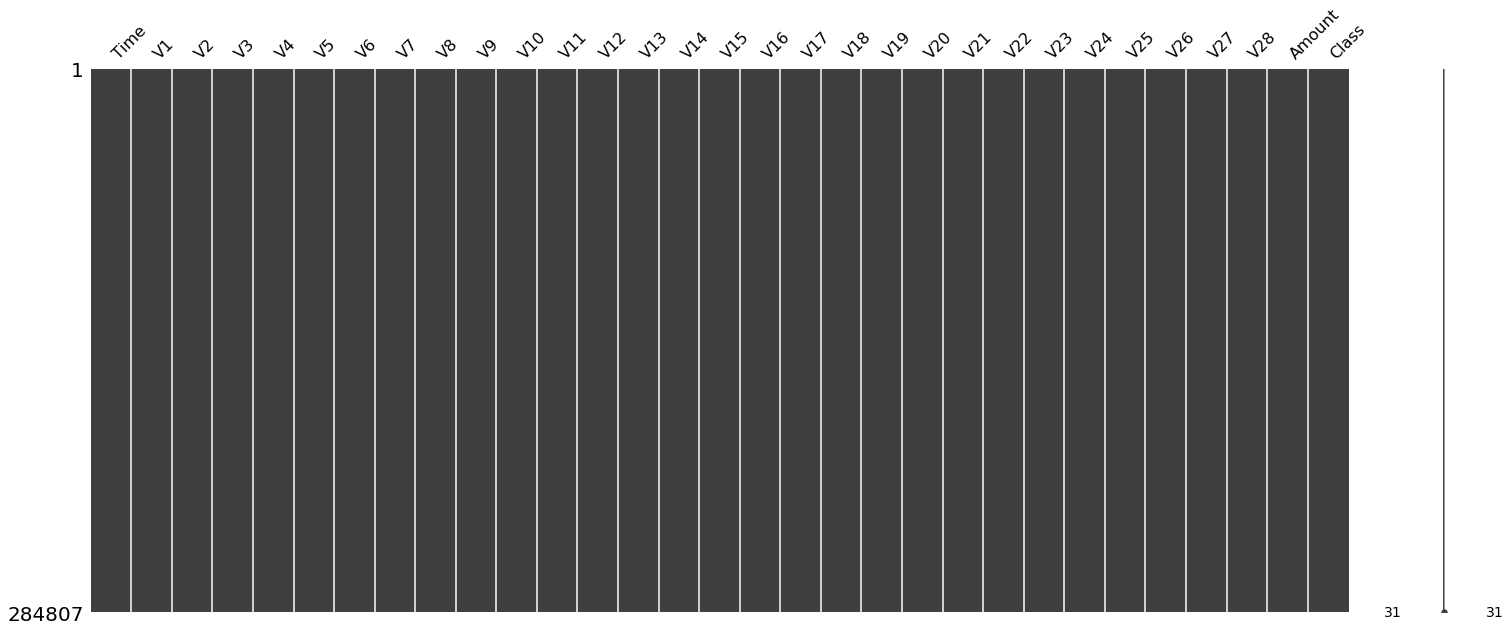

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
# resume
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


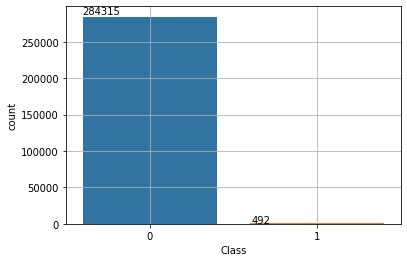

In [8]:
plt.figure()
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()
plt.show()

In [9]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


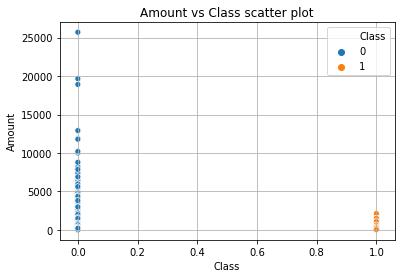

In [10]:
sns.scatterplot(df["Class"],df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

In [11]:
df = df.drop(["Time"], axis=1)

In [12]:
# Escalamos la variable amount  

from sklearn.preprocessing import StandardScaler

# scaler
scaler = StandardScaler()

#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop(["Amount"], axis=1)

In [13]:
# Remover clase para visualizar distribuciones
df_temp = df.drop("Class", axis = 1)

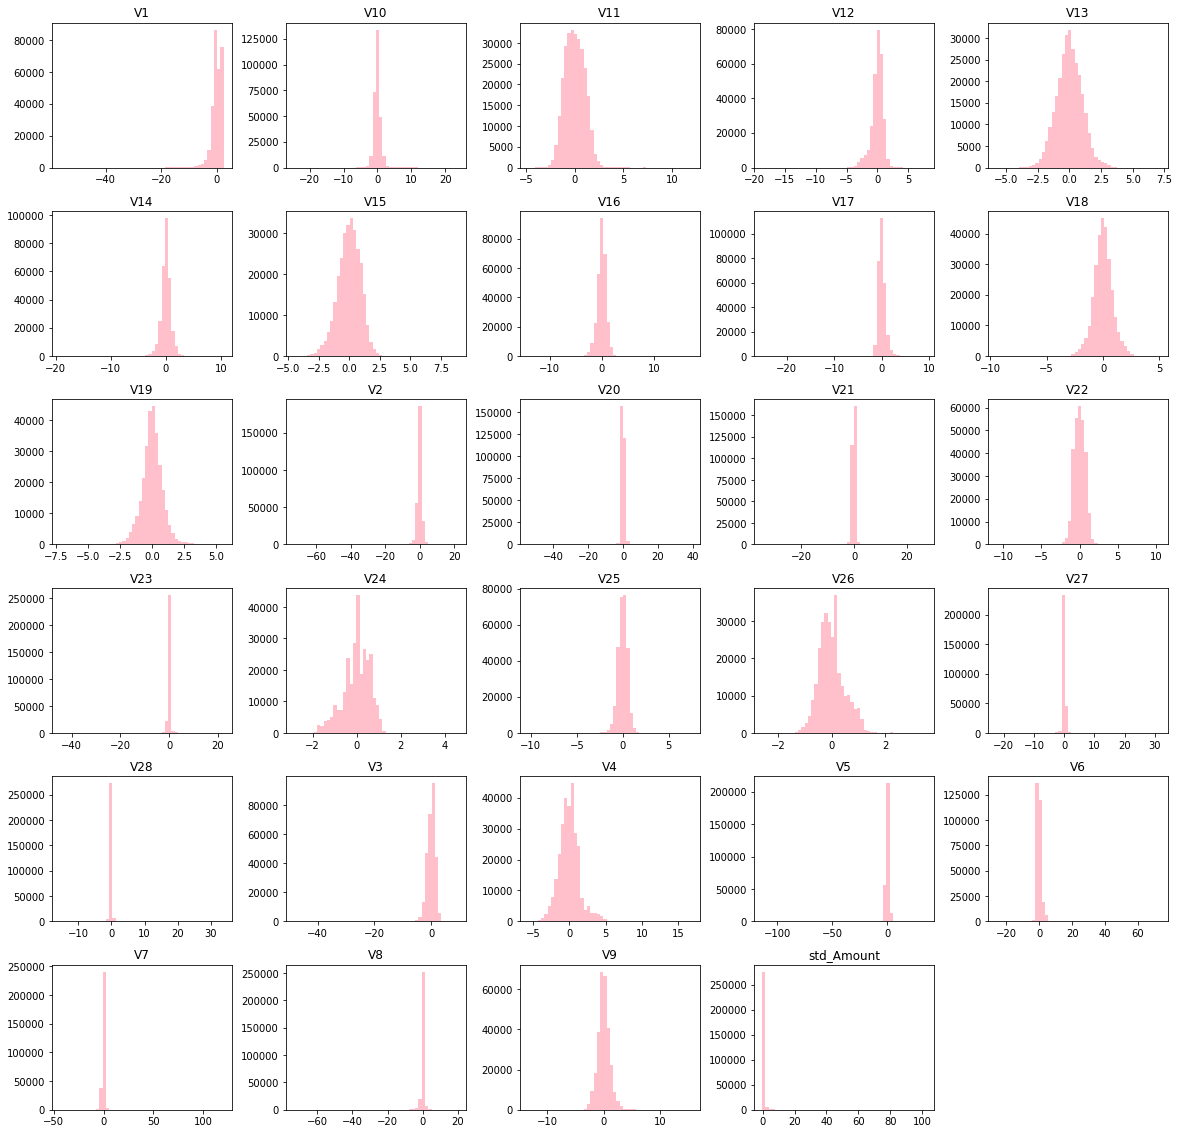

In [14]:
# Check distribution
df_temp.hist(figsize = (20, 20), color = 'pink', bins=50, grid=False)
plt.show()

In [15]:
#to see the skewness
skewed = pd.DataFrame(df_temp.skew(), columns=['skewness'])
skewed

,skewness
V1,-3.280667
V2,-4.624866
V3,-2.240155
V4,0.676292
V5,-2.425901
V6,1.826581
V7,2.553907
V8,-8.521944
V9,0.554680
V10,1.187141


In [16]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed_features = skewed.loc[(skewed["skewness"] > 1) | (skewed["skewness"] <-1 )].index
skewed_features.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V27',
 'V28',
 'std_Amount']

In [17]:
from sklearn.preprocessing import PowerTransformer

# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()

# Fitting the power transformer in data
df_temp[skewed_features] = pt.fit_transform(df_temp[skewed_features])

In [18]:
df_temp.skew()

V1           -0.218003
V2            0.334852
V3           -0.079980
V4            0.676292
V5           -1.170100
V6           -1.937469
V7            2.594575
V8            2.297590
V9            0.554680
V10          -1.318334
V11           0.356506
V12           0.158932
V13           0.065233
V14           0.105966
V15          -0.308423
V16           0.137437
V17          -0.791141
V18          -0.259880
V19           0.109192
V20          -0.923653
V21          -1.966863
V22          -0.213258
V23          -0.249209
V24          -0.552499
V25          -0.415793
V26           0.576693
V27           3.465031
V28           1.069193
std_Amount    0.706796
dtype: float64

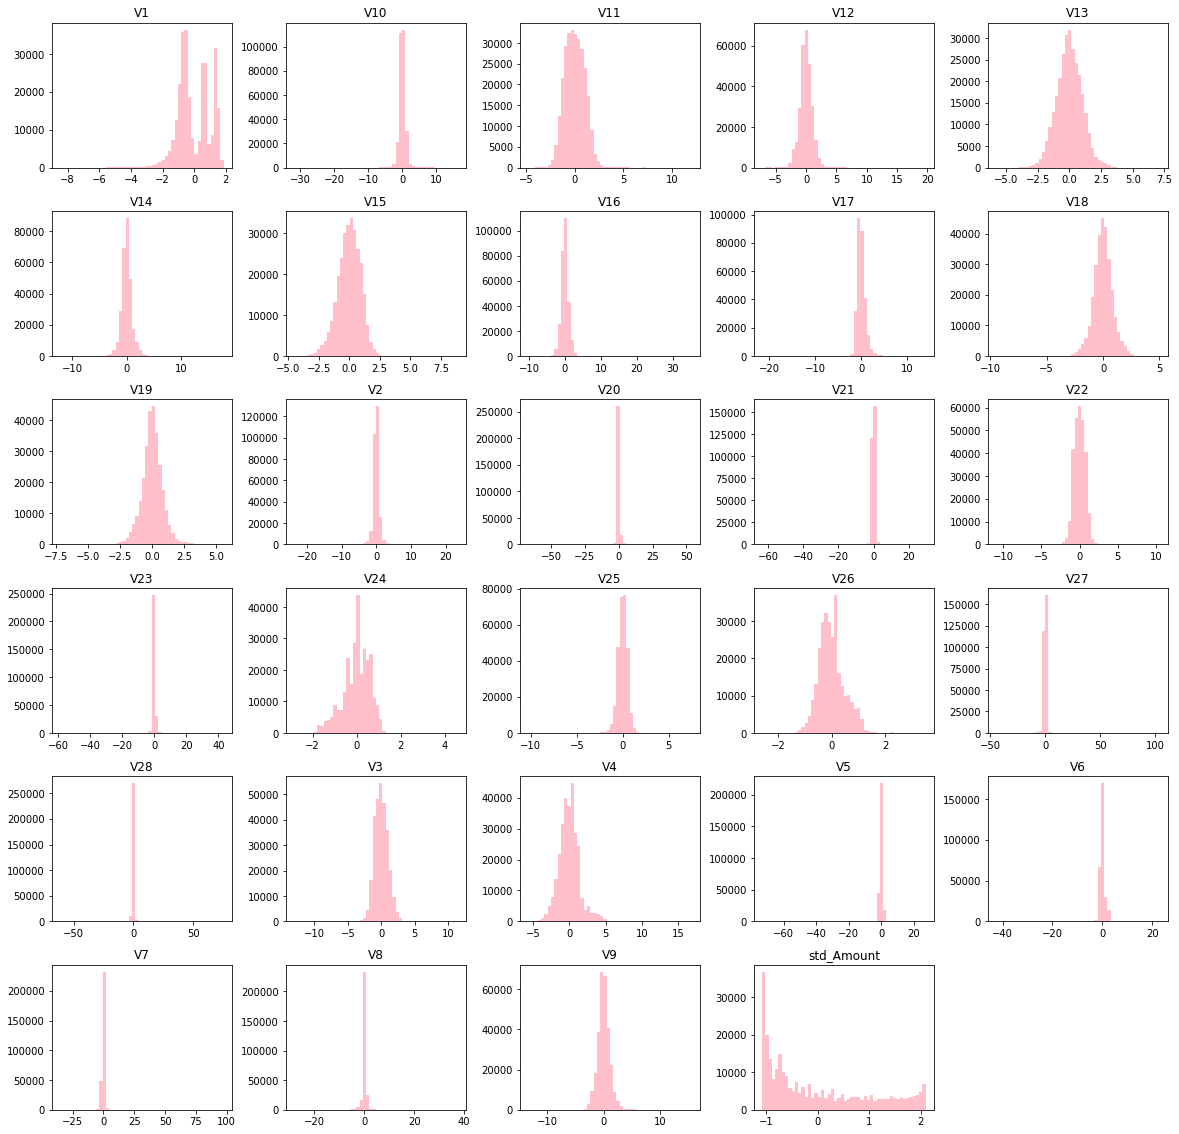

In [19]:
# Check distribution again
df_temp.hist(figsize = (20, 20), color = 'pink', bins=50, grid=False)
plt.show()

In [20]:
# Agregar al df normal las nuevas distribuciones
df[skewed_features] = df_temp[skewed_features]
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
0,-0.904815,-0.131503,2.176074,1.378155,-0.256110,0.459227,0.193516,0.020305,0.363787,0.127074,...,-0.007670,0.277838,-0.189647,0.066928,0.128539,-0.189115,0.323027,-0.053332,0,1.438680
1,0.626390,0.093067,-0.035062,0.448154,0.031947,0.045846,-0.063874,0.006711,-0.255425,-0.115195,...,-0.298760,-0.638672,0.153342,-0.339846,0.167170,0.125895,-0.035793,0.057491,0,-0.979904
2,-0.904242,-0.871858,1.381297,0.379780,-0.374492,1.320901,0.639714,0.172348,-1.514654,0.234324,...,0.357879,0.771679,1.501808,-0.689281,-0.327642,-0.139097,-0.151417,-0.173752,0,1.942107
3,-0.742857,-0.202760,1.401049,-0.863291,-0.019151,0.983351,0.191907,0.309141,-1.387024,-0.008922,...,-0.133275,0.005274,-0.317680,-1.175575,0.647376,-0.221929,0.144087,0.201524,0,1.269186
4,-0.823641,0.530197,1.160592,0.403034,-0.305614,0.187360,0.479194,-0.331706,0.817739,0.718432,...,0.004660,0.798278,-0.232990,0.141267,-0.206010,0.502292,0.541488,0.669838,0,0.674248


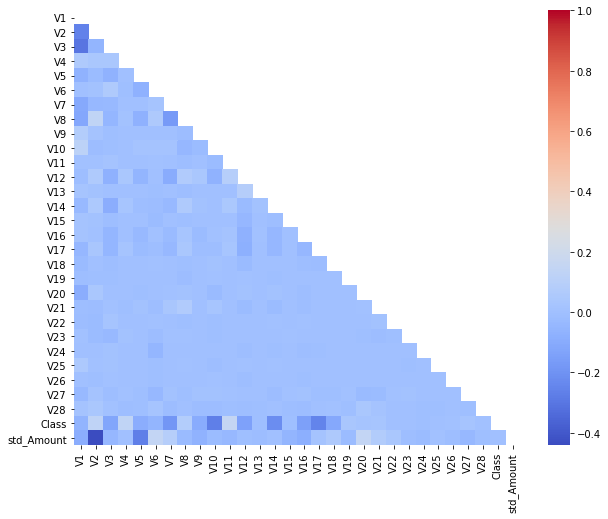

In [21]:
matrix = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.heatmap(df.corr(), mask=matrix, cmap= 'coolwarm', ax=ax)

plt.show()

In [22]:
# Undersampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.3)

In [23]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [24]:
#define X and Y
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [25]:
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

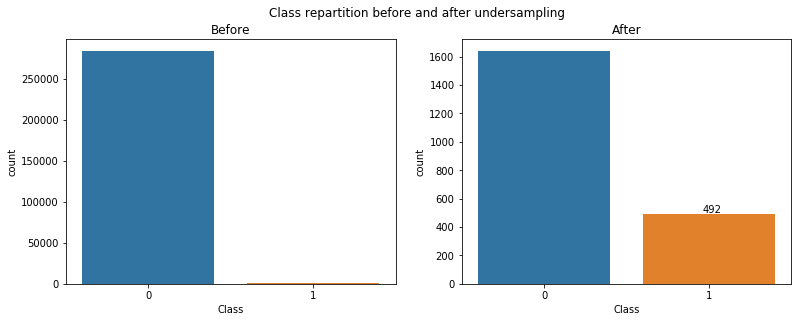

In [26]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
plt.text(0.96,500,'492')
a2.set_title("After")

In [27]:
Y_under.value_counts()

0    1640
1     492
Name: Class, dtype: int64

In [71]:
1640/492

3.3333333333333335

In [70]:
492/(492+1640)

0.23076923076923078

In [28]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.25, random_state=1, stratify=Y_under)

In [30]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [31]:
# GRID
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= ['precision','recall'],
                        refit='recall',
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9027087370477271


In [32]:
print('Best hyperparameters: ', model_cv.best_params_)

Best hyperparameters:  {'C': 10}


In [33]:
# Instantiating the model with best C
log_reg_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=10)

In [34]:
"""# Train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)"""

'# Train the model\nlog_reg = LogisticRegression()\nlog_reg.fit(X_train, y_train)'

In [35]:
log_reg_imb_model.score(X_test, y_test)

0.9512195121951219

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_reg_imb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       410
           1       0.91      0.87      0.89       123

    accuracy                           0.95       533
   macro avg       0.94      0.92      0.93       533
weighted avg       0.95      0.95      0.95       533



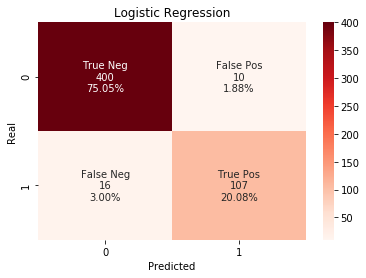

In [37]:
from sklearn.metrics import confusion_matrix

cf_matrix  = confusion_matrix(y_test, log_reg_imb_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Logistic Regression')
plt.show()

In [38]:
from sklearn.metrics import roc_curve, auc

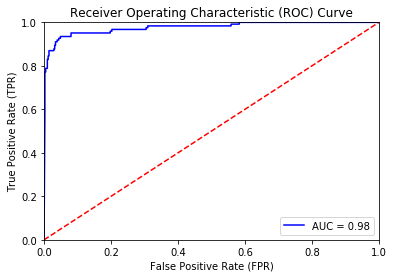

In [39]:
log_preds = log_reg_imb_model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, log_preds)
roc_auc = auc(fpr, tpr)
log_y_hat = log_reg_imb_model.predict(X_test)

plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(roc_auc.round(2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

In [40]:
# GRID
params = {"C": [i for i in range(1,11)], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
folds = KFold(n_splits=5, shuffle=True, random_state=42)


#perform cross validation
model_cv = GridSearchCV(estimator = SVC(),
                        param_grid = params, 
                        scoring= ['precision','recall'],
                        refit='recall',
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best ROC AUC score:  0.9004297424105235


In [41]:
model_cv.best_params_

{'C': 8, 'kernel': 'rbf'}

In [42]:
# Instantiating the model with best C
log_reg_imb_model = SVC(C=8, kernel='rbf', probability=True)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

SVC(C=8, probability=True)

In [43]:
log_reg_imb_model.score(X_test, y_test)

0.9549718574108818

In [44]:
print(classification_report(y_test, log_reg_imb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       410
           1       0.95      0.85      0.90       123

    accuracy                           0.95       533
   macro avg       0.95      0.92      0.93       533
weighted avg       0.95      0.95      0.95       533



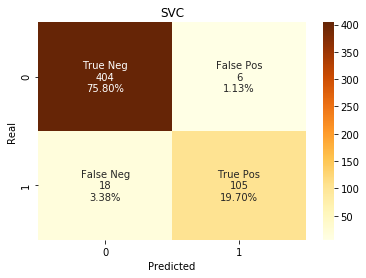

In [45]:
cf_matrix  = confusion_matrix(y_test, log_reg_imb_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('SVC')
plt.show()

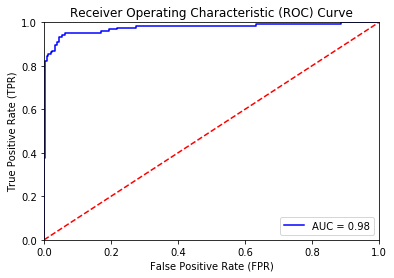

In [46]:
svc_preds = log_reg_imb_model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, svc_preds)
roc_auc = auc(fpr, tpr)
svc_y_hat = log_reg_imb_model.predict(X_test)

plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(roc_auc.round(2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

In [47]:
params = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8,9,10]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)


#perform cross validation
model_cv = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = params, 
                        scoring= ['precision','recall'],
                        refit='recall',
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best ROC AUC score:  0.8977630757438568


In [48]:
model_cv.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [49]:
# Train the model
log_reg_imb_model = DecisionTreeClassifier(criterion='entropy', max_depth= 6)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [50]:
log_reg_imb_model.score(X_test, y_test)

0.9474671669793621

In [51]:
print(classification_report(y_test, log_reg_imb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       410
           1       0.92      0.85      0.88       123

    accuracy                           0.95       533
   macro avg       0.94      0.91      0.92       533
weighted avg       0.95      0.95      0.95       533



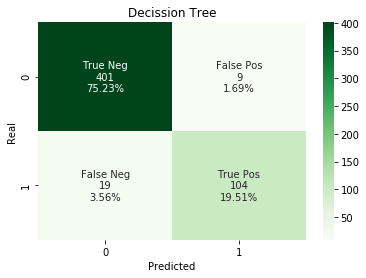

In [52]:
cf_matrix  = confusion_matrix(y_test, log_reg_imb_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Decission Tree')
plt.show()

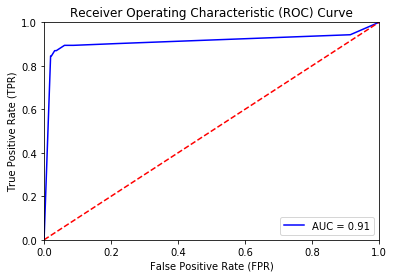

In [53]:
tree_preds = log_reg_imb_model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, tree_preds)
roc_auc = auc(fpr, tpr)
tree_y_hat = log_reg_imb_model.predict(X_test)

plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(roc_auc.round(2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

In [54]:
params = {'alpha':[0.0001,0.001,0.01,0.1,1]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)


#perform cross validation
model_cv = GridSearchCV(estimator = Perceptron(),
                        param_grid = params, 
                        scoring= ['precision','recall'],
                        refit='recall',
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best ROC AUC score:  0.8767347110737012


In [55]:
model_cv.best_params_

{'alpha': 0.0001}

In [56]:
# Train the model
log_reg_imb_model = Perceptron(alpha=1e-04)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

Perceptron()

In [57]:
log_reg_imb_model.score(X_test, y_test)

0.9530956848030019

In [58]:
print(classification_report(y_test, log_reg_imb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       410
           1       0.95      0.85      0.89       123

    accuracy                           0.95       533
   macro avg       0.95      0.92      0.93       533
weighted avg       0.95      0.95      0.95       533



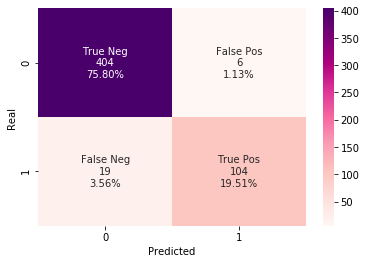

In [59]:
cf_matrix  = confusion_matrix(y_test, log_reg_imb_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

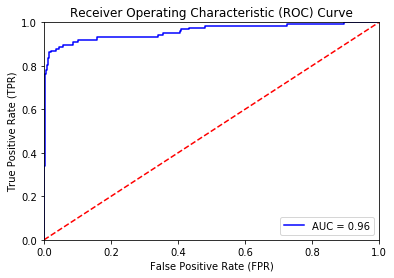

In [60]:
per_preds = log_reg_imb_model.decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, per_preds)
roc_auc = auc(fpr, tpr)
per_y_hat = log_reg_imb_model.predict(X_test)

plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(roc_auc.round(2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

In [61]:
params = {'n_neighbors':[i for i in range(2,11)]}
folds = KFold(n_splits=5, shuffle=True, random_state=42)


#perform cross validation
model_cv = GridSearchCV(estimator = KNeighborsClassifier(),
                        param_grid = params, 
                        scoring= ['precision','recall'],
                        refit='recall', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best ROC AUC score:  0.8840007186979177


In [62]:
model_cv.best_params_

{'n_neighbors': 3}

In [63]:
# Train the model
log_reg_imb_model = KNeighborsClassifier(n_neighbors= 3)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
log_reg_imb_model.score(X_test, y_test)

0.9624765478424016

In [65]:
print(classification_report(y_test, log_reg_imb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       410
           1       0.97      0.86      0.91       123

    accuracy                           0.96       533
   macro avg       0.97      0.93      0.94       533
weighted avg       0.96      0.96      0.96       533



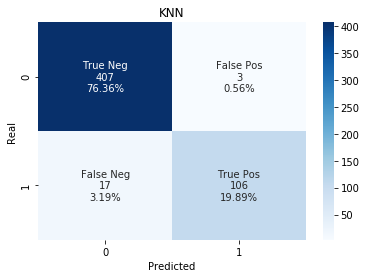

In [66]:
cf_matrix  = confusion_matrix(y_test, log_reg_imb_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('KNN')
plt.show()

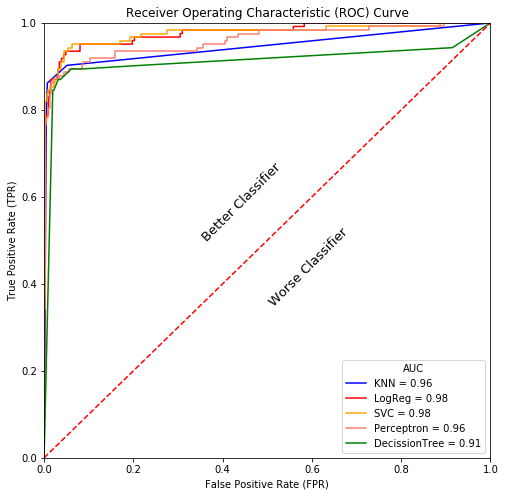

In [67]:
plt.figure(figsize=(8,8))
knn_preds = log_reg_imb_model.predict_proba(X_test)[:,1]
knn_y_hat = log_reg_imb_model.predict(X_test)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_preds)
knn_roc_auc = auc(fpr, tpr)

log_fpr, log_tpr, threshold = roc_curve(y_test, log_preds)
log_roc_auc = auc(log_fpr, log_tpr)

per_fpr, per_tpr, threshold = roc_curve(y_test, per_preds)
per_roc_auc = auc(per_fpr, per_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_test, svc_preds)
svc_roc_auc = auc(svc_fpr, svc_tpr)

tree_fpr, tree_tpr, threshold = roc_curve(y_test, tree_preds)
tree_roc_auc = auc(tree_fpr, tree_tpr)

plt.plot(knn_fpr, knn_tpr, 'b', label = 'KNN = {}'.format(knn_roc_auc.round(2)))

plt.plot(log_fpr, log_tpr, 'r', label = 'LogReg = {}'.format(log_roc_auc.round(2)))

plt.plot(svc_fpr, svc_tpr, 'orange', label = 'SVC = {}'.format(svc_roc_auc.round(2)))

plt.plot(per_fpr, per_tpr, 'salmon', label = 'Perceptron = {}'.format(per_roc_auc.round(2)))

plt.plot(tree_fpr, tree_tpr, 'g', label = 'DecissionTree = {}'.format(tree_roc_auc.round(2)))



plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.text(.35, .5, 'Better Classifier', fontsize=13, rotation=45)
plt.text(.5, .35, 'Worse Classifier', fontsize=13, rotation=45)
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right', title='AUC')

plt.show()

Logistic: f1=0.892 auc=0.953


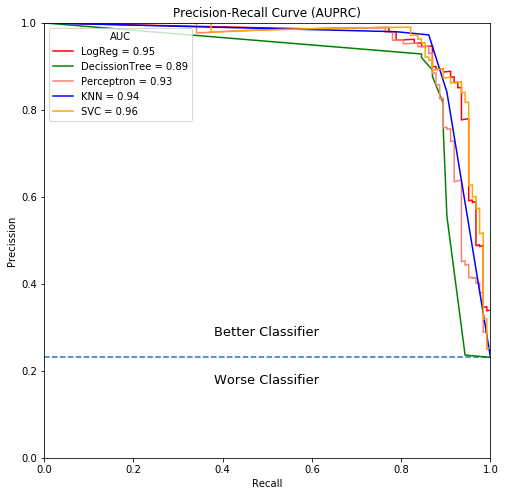

In [68]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

plt.figure(figsize=(8,8))


log_lr_precision, log_lr_recall, _ = precision_recall_curve(y_test, log_preds)

per_lr_precision, per_lr_recall, _ = precision_recall_curve(y_test, per_preds)

knn_lr_precision, knn_lr_recall, _ = precision_recall_curve(y_test, knn_preds)

tree_lr_precision, tree_lr_recall, _ = precision_recall_curve(y_test, tree_preds)

svc_lr_precision, svc_lr_recall, _ = precision_recall_curve(y_test, svc_preds)

log_lr_f1, log_lr_auc = f1_score(y_test, log_y_hat), auc(log_lr_recall, log_lr_precision)

per_lr_f1, per_lr_auc = f1_score(y_test, per_y_hat), auc(per_lr_recall, per_lr_precision)

knn_lr_f1, knn_lr_auc = f1_score(y_test, knn_y_hat), auc(knn_lr_recall, knn_lr_precision)

svc_lr_f1, svc_lr_auc = f1_score(y_test, svc_y_hat), auc(svc_lr_recall, svc_lr_precision)

tree_lr_f1, tree_lr_auc = f1_score(y_test, tree_y_hat), auc(tree_lr_recall, tree_lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (log_lr_f1, log_lr_auc))

# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(log_lr_recall, log_lr_precision, 'r', label='LogReg = {}'.format(log_lr_auc.round(2)))

plt.plot(tree_lr_recall, tree_lr_precision, 'g', label='DecissionTree = {}'.format(tree_lr_auc.round(2)))

plt.plot(per_lr_recall, per_lr_precision, 'salmon', label='Perceptron = {}'.format(per_lr_auc.round(2)))

plt.plot(knn_lr_recall, knn_lr_precision, 'b', label='KNN = {}'.format(knn_lr_auc.round(2)))

plt.plot(svc_lr_recall, svc_lr_precision, 'orange', label='SVC = {}'.format(svc_lr_auc.round(2)))

plt.legend(title='AUC', loc= 'upper left')

plt.xlim([0,1])
plt.ylim([0,1])

plt.text(0.38,0.28, 'Better Classifier', fontsize=13)
plt.text(0.38,0.17, 'Worse Classifier', fontsize=13)

plt.xlabel('Recall')
plt.ylabel('Precission')
plt.title('Precision-Recall Curve (AUPRC)'
         )

plt.show()